In [6]:

pre_trained_log_file_path = '../results/Baseline-WebCaricature-resnet18-5-5-Jan-09-2024-22-04-28/log_files/Baseline-resnet18-test-Jan-10-2024-00-09-41.log'
log_file_path = '../results/Baseline-WebCaricature-resnet18-5-5-Jan-08-2024-17-02-40/log_files/Baseline-resnet18-test-Jan-08-2024-19-19-34.log'
# Read the first 50 lines of the file to understand its structure
lines_to_read = 50

with open(log_file_path, 'r') as file:
    first_lines = [next(file) for _ in range(lines_to_read)]

first_lines

["2024-01-08 19:19:35,920 [INFO] core.test: {'data_root': './WebCaricature', 'image_size': 84, 'use_memory': False, 'augment': True, 'augment_times': 1, 'augment_times_query': 1, 'workers': 8, 'dataloader_num': 1, 'device_ids': '0', 'n_gpu': 1, 'seed': 2147483647, 'deterministic': True, 'port': 44270, 'log_name': None, 'log_level': 'info', 'log_interval': 100, 'log_paramerter': False, 'result_root': './results', 'save_interval': 10, 'save_part': ['emb_func'], 'tag': None, 'epoch': 50, 'test_epoch': 5, 'parallel_part': ['emb_func'], 'pretrain_path': None, 'resume': False, 'way_num': 5, 'shot_num': 5, 'query_num': 11, 'test_way': 5, 'test_shot': 5, 'test_query': 11, 'episode_size': 2, 'train_episode': 100, 'test_episode': 600, 'batch_size': 128, 'val_per_epoch': 1, 'optimizer': {'kwargs': {'lr': 0.01}, 'name': 'Adam', 'other': None}, 'lr_scheduler': {'kwargs': {'gamma': 1.0, 'step_size': 20}, 'name': 'StepLR'}, 'warmup': 0, 'includes': ['headers/data.yaml', 'headers/device.yaml', 'header

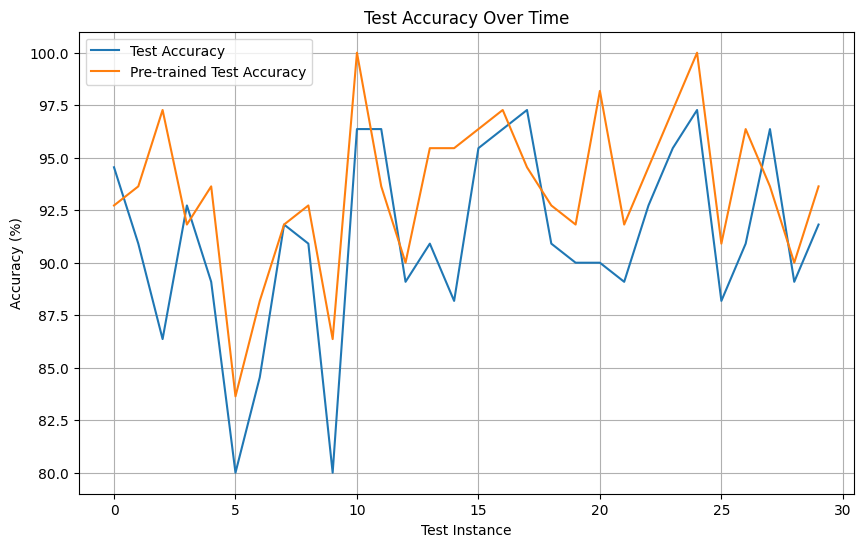

In [7]:
import re
import matplotlib.pyplot as plt
# Initialize a list to hold test accuracy values
test_acc = []
pre_test_acc = []
# Regular expression pattern to match accuracy values
pattern = re.compile(r'Acc@1 ([0-9]+\.?[0-9]*)')

# Open and read the log file
with open(log_file_path, 'r') as file:
    for line in file:
        match = pattern.search(line)
        if match:
            # Append the found accuracy value to the list
            test_acc.append(float(match.group(1)))

with open(pre_trained_log_file_path, 'r') as file:
    for line in file:
        match = pattern.search(line)
        if match:
            # Append the found accuracy value to the list
            pre_test_acc.append(float(match.group(1)))

# Plotting the test accuracy values
plt.figure(figsize=(10, 6))
plt.plot(test_acc, label='Test Accuracy')
plt.plot(pre_test_acc, label='Pre-trained Test Accuracy')
plt.xlabel('Test Instance')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Time')
plt.legend()
plt.grid(True)
plt.show()